In [1]:
# In this notebook I will show that normal distribution is only required for residuals with mean of zero
# and not required neither for response variable, nor for explanatory variable.
# That only means that most data points should be close to regression line and
# the greater the distance the fewer the data points.
# Otherwise using linear regression is not a good idea.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib.patches import ArrowStyle, ConnectionStyle

In [3]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Simple linear regression

In [4]:
# Dataset
X = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 14, 14, 14, 15, 15, 16, 16, 16, 17, 18, 18, 19, 19, 19])
T = np.array([1, 3, 3, 2, 3, 5, 5, 2, 5, 7, 6, 8, 6, 5, 9, 7, 8, 8, 9, 9, 11, 12, 10, 10, 11, 12, 11, 12, 10, 12, 11, 13, 14, 14, 15, 14, 16, 15, 17, 16, 17, 17, 19, 18])

In [5]:
def mse(T, Y):
    
    """
    Calculate mean squared error value.

    Parameters
    ----------
        
        T : numpy.ndarray
            Vector of expected outputs
            
        Y : numpy.ndarray
            Vector of response variable values

    Returns
    -------
        
        out : float
            Value of mean squared error
    """
    
    return ((Y - T) ** 2).sum() / len(Y)

In [6]:
def fit(X, T, epochs=100, lr=0.0001):
    
    """
    Calculates slope and intercept of the best fit line.

    Parameters
    ----------
    
        X : numpy.ndarray
            Vector of explanatory variable values
        
        T : numpy.ndarray
            Vector of expected outputs
            
        epochs : int
            Number of epochs
        
        lr : float
            lr stands for learning rate

    Returns
    -------

        out : tuple
            tuple containing slope and intercept of best fit line
    """
    
    # Initializing slope and intercept with random values
    k, b = np.random.sample(2)
    # Number of training samples
    n = len(X)

    # Training the model
    for _ in range(epochs):
        # Calculating our linear regression prediction vector
        Y = k * X + b
        
        # Computing gradient itself
        nabla_k = (2 * X * (Y - T)).sum()
        nabla_b = (2 * (Y - T)).sum()
        
        # Updating slope and intercept
        k -= lr * nabla_k
        b -= lr * nabla_b
    
    print(f'MSE: {mse(T, k * X + b)}')
    return k, b

In [7]:
k, b = fit(X, T, epochs=10000)

MSE: 1.052938835990451


# Visualization

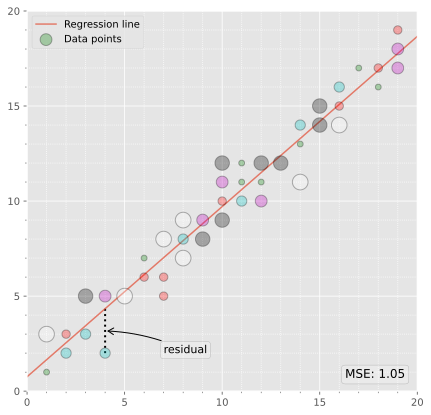

In [8]:
# x and y-coords for the regression line
x = np.array([-10, 20])
y = k * x + b

# Create figure and axes
fig, ax = plt.subplots(figsize=(7, 7))

# Set axis' configurations
ax.set_xlim(left=0, right=20)
ax.set_ylim(bottom=0, top=20)
ax.xaxis.set_major_locator(MultipleLocator(base=5))
ax.yaxis.set_major_locator(MultipleLocator(base=5))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.grid(which='minor', ls=':')

# Set colors for data points
bc = mcolors.BASE_COLORS
num_set = np.random.randint(1, len(mcolors.BASE_COLORS), len(X))
sizes = num_set * 35
colors = [list(bc.keys())[i] for i in num_set]

# Plot
ax.plot(x, y, label='Regression line', alpha=0.7, zorder=2)
ax.plot([4, 4], [2, k * 4 + b], c='k', lw=2, ls=':', zorder=1)
ax.scatter(X, T, label='Data points', c=colors, s=sizes, linewidth=1, ec='k', alpha=0.3, zorder=3)

# Annotate residual
arrowstyle = ArrowStyle.CurveB(head_length=0.5, head_width=0.3)
connectionstyle = ConnectionStyle.Arc3(rad=0.1)
arrow_style = dict(color='k', linewidth=1, arrowstyle=arrowstyle, connectionstyle=connectionstyle)
bbox_properties = dict(boxstyle='round', alpha=0.2, facecolor='w', edgecolor='k')
ax.annotate(text='residual', bbox=bbox_properties, fontsize=11,
             xy=(4, 2 + (k * 4 + b - 2) / 2), xytext=(7, 2), arrowprops=arrow_style)

# Set legend and text
ax.legend(loc='upper left')
error = mse(T, k * X + b)
ax.text(x=16.3, y=0.7, s=f'MSE: {error:.2f}', fontsize=12, fontweight=0, color='k', bbox=bbox_properties);

In [9]:
# If we had a lot of data points far from the regression line
# then the distribution of the residuals would be far from normal.

## Distribution of the residuals

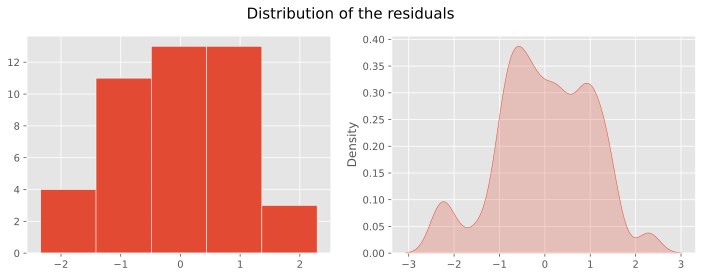

In [10]:
# Residuals should be normally distributed
residuals = [T[i] - (k * X[i] + b) for i in range(len(X))]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle(t='Distribution of the residuals', fontsize=15)

axs[0].hist(residuals, bins=5, ec='w')
sns.kdeplot(residuals, fill=True, bw_adjust=.5);

## Distribution of the response variable

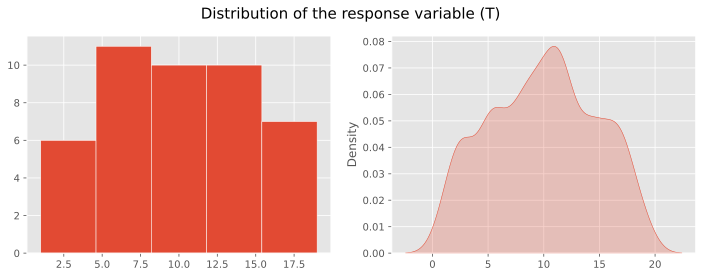

In [11]:
# Response variable values don't have to be normally distributed
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle(t='Distribution of the response variable (T)', fontsize=15)

axs[0].hist(T, bins=5, ec='w')
sns.kdeplot(T, fill=True, bw_adjust=.5);

## Distribution of the explanatory variable

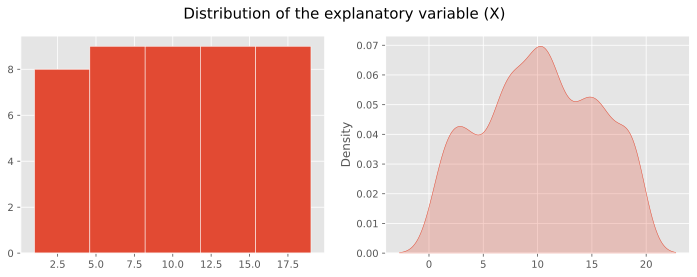

In [12]:
# Exaplanatory variable values don't have to be normally distributed as well
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle(t='Distribution of the explanatory variable (X)', fontsize=15)

axs[0].hist(X, bins=5, ec='w')
sns.kdeplot(X, fill=True, bw_adjust=.5);